# VGG 16

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 #Use the GPU memory 50%
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob #inside the folders how many sub folders are present?


In [5]:
tf.__version__

'2.3.0'

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#train_path = 'Datasets/train'
#valid_path = 'Datasets/test'

train_path='C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train'
valid_path='C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\test'

In [7]:
IMAGE_SIZE + [3]

[224, 224, 3]

In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
#Preprocessing  - reuse with some modifications
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#Here i am going to take the weights, what ever weights they had stored during training iam going to retreive those weights 
#If we failed to provide the weights('Imagenet') then it starts the training from Scratch.
#include_top = False -->  Default 1000 outputs but in our case only 2 outputs, It skips the flatten and output layer and we can add our own flatten layer and output layer
#include_top=True(which means - whole architecture - input,flatten,output from the VGG16 for Imagenet classification)


58892288/58889256 [==============================] - 26s 0us/step


In [9]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# don't train existing weights
# Dont train the weights from scratch or dont update the weight and my weights are fixed.
for layer in vgg16.layers:
    layer.trainable = False

In [11]:
  # useful for getting number of output classes
#folders = glob('Datasets/train/*')
folders = glob('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train\*')

In [12]:
folders

['C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train\\cats',
 'C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train\\dogs']

In [13]:
# Flatten Layer
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [14]:
#Output Layer
prediction = Dense(len(folders), activation='softmax')(x) # x - appending my flatten layer(x) with dense layer

# create a model object  by combining the entire input's and output's to create the dense neural network
#Here vgg16 is the model or variable that we have created early
model = Model(inputs=vgg16.input, outputs=prediction)

In [16]:

# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [17]:
#multiclass classification(softmax) - so we have used categorical_crossentropy as a loss function
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8005 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [23]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
251/251 [==============================] - 117s 466ms/step - loss: 0.0856 - accuracy: 0.9678 - val_loss: 0.4623 - val_accuracy: 0.8853
Epoch 2/10
251/251 [==============================] - 117s 467ms/step - loss: 0.0954 - accuracy: 0.9633 - val_loss: 0.3066 - val_accuracy: 0.9254
Epoch 3/10
251/251 [==============================] - 118s 470ms/step - loss: 0.1101 - accuracy: 0.9583 - val_loss: 0.3356 - val_accuracy: 0.9209
Epoch 4/10
251/251 [==============================] - 119s 473ms/step - loss: 0.0742 - accuracy: 0.9701 - val_loss: 0.2990 - val_accuracy: 0.9298
Epoch 5/10
251/251 [==============================] - 118s 472ms/step - loss: 0.1081 - accuracy: 0.9614 - val_loss: 0.2911 - val_accuracy: 0.9328
Epoch 6/10
251/251 [==============================] - 118s 470ms/step - loss: 0.0832 - accuracy: 0.9690 - val_loss: 0.2893 - val_accuracy: 0.9323
Epoch 7/10
251/251 [==============================] - 118s 470ms/step - loss: 0.0774 - accuracy: 0.9726 - val_loss: 0.3434 -

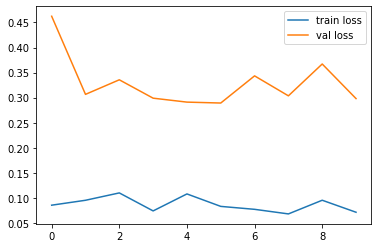

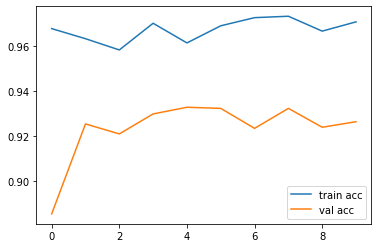

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16_CatDog.h5')

In [53]:
#Prediction
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_vgg16_CatDog.h5')

In [54]:
#img=image.load_img('C:\\Users\\Asus-2020\Downloads\\Cat and Dog\\test\\dogs\\dog.4017.jpg',target_size=(224,224))

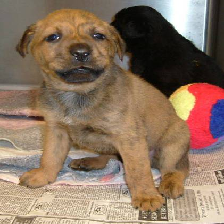

In [55]:
#img

In [56]:
#Covert in to an array
#x=image.img_to_array(img)
#x

In [57]:
#x.shape

In [61]:
test_image = image.load_img('C:\\Users\\Asus-2020\Downloads\\Cat and Dog\\test\\dogs\\dog.4017.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
#covert the array values in to noramalize values
test_image=test_image/255
#Exapnd the dimensions
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image) 

In [64]:
#test_image

In [63]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\Asus-2020\Downloads\\Cat and Dog\\test\\dogs\\dog.4017.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
a=np.argmax(model.predict(test_image), axis=1)
if a==0:
    print("Cat")
else:
    print("Dog")
#training_set.class_indices
#if result[0][0] == 1:
    #prediction = 'dog'
    #print(prediction)
#else:
    #prediction = 'cat'
    #print(prediction)

Dog
